In [201]:
import itk
import matplotlib.pyplot as plt

In [202]:
# ----------------------
# Lecture de l'image
# ----------------------
input_filename = 'data/brain.png'
image = itk.imread(input_filename)
ImageType = type(image) # On récupère le type de l'image
# ----------------------
# Création et paramétrage du filtre
# ----------------------
smoothFilter = itk.SmoothingRecursiveGaussianImageFilter[ImageType,
ImageType].New() # On créé une instance du filtre qui prend en entrée et ressort des images du même type que l'image d'entrée

smoothFilter.SetInput(image) # On spécifie l'image d'entrée du filtre
smoothFilter.SetSigma(.2) # On spécifie la variance du filtre
itk.imwrite(smoothFilter.GetOutput(), 'data/brain_smooth_0.2.png') # On écrit l'image de sortie du filtre

In [203]:
OutputType = type(smoothFilter.GetOutput()) # On récupère le type de l'image de sortie du filtre
# On créé une instance du filtre qui prend en entrée et ressort des images du même type que l'image d'entrée
diff_filter = itk.AbsoluteValueDifferenceImageFilter[ImageType, ImageType, OutputType].New() 
diff_filter.SetInput1(image) # On spécifie l'image d'entrée du filtre
diff_filter.SetInput2(itk.imread("data/brain_smooth_2.0.png")) # On spécifie l'image d'entrée du filtre
itk.imwrite(diff_filter.GetOutput(), 'data/brain_diff_0.2.png') # On écrit l'image de sortie du filtre

In [204]:
im_rec_1 = itk.imread("data/BrainProtonDensitySliceShifted13x17y.png")
im_rec_2 = itk.imread("data/BrainProtonDensitySliceBorder20.png")

In [264]:
optimizer = itk.RegularStepGradientDescentOptimizer.New()
optimizer.SetMaximumStepLength(1.0)
optimizer.SetMinimumStepLength(0.0)
optimizer.SetNumberOfIterations(5000)
initialTransform = itk.TranslationTransform[itk.D, 2].New()
initialParameters = initialTransform.GetParameters()
initialParameters[0] = 0
initialParameters[1] = 0



In [265]:
f=[]
def getMetricValue():
    f.append(optimizer.GetValue())

In [266]:
registration_filter = itk.ImageRegistrationMethod[ImageType, ImageType].New()
registration_filter.SetFixedImage(im_rec_1)
registration_filter.SetMovingImage(im_rec_2)
registration_filter.SetOptimizer(optimizer)
registration_filter.SetTransform(initialTransform)
registration_filter.SetInitialTransformParameters(initialParameters)
registration_filter.SetInterpolator(itk.LinearInterpolateImageFunction[ImageType, itk.D].New())
registration_filter.SetMetric(itk.MeanSquaresImageToImageMetric[ImageType, ImageType].New())
optimizer.AddObserver(itk.IterationEvent(), getMetricValue)
registration_filter.Update()


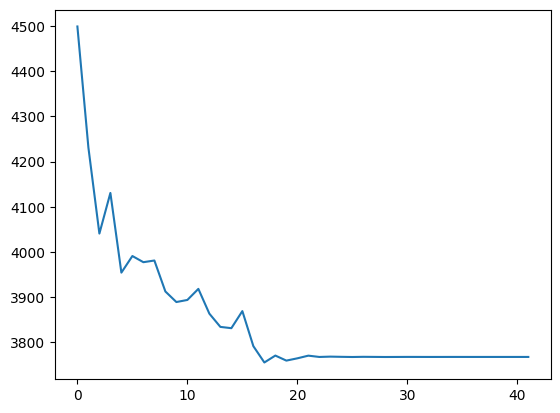

In [267]:
plt.plot(f)

In [209]:
final_transform = registration_filter.GetTransform()
resample_filter = itk.ResampleImageFilter[ImageType, ImageType].New()
resample_filter.SetInput(im_rec_2)
resample_filter.SetTransform(final_transform)
resample_filter.SetSize(im_rec_1.GetLargestPossibleRegion().GetSize())
itk.imwrite(resample_filter.GetOutput(), 'data/brain_recalage.png')

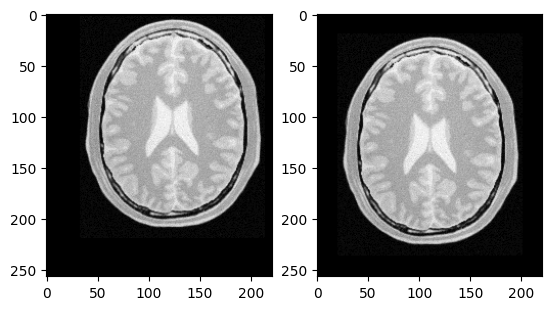

In [210]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im_rec_1,'gray')
ax2.imshow(im_rec_2,'gray')
plt.show()

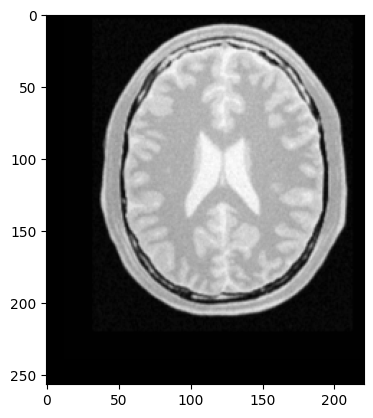

In [211]:
plt.imshow(resample_filter.GetOutput(),'gray')
plt.show()

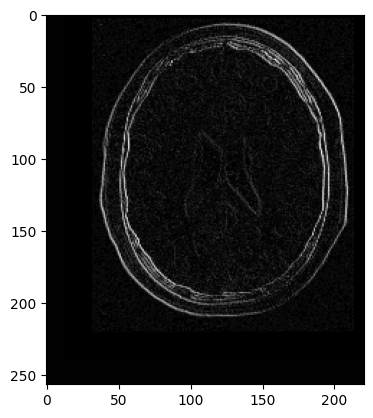

In [212]:
AbsoluteDiff = itk.absolute_value_difference_image_filter(im_rec_1, resample_filter.GetOutput())
plt.imshow(AbsoluteDiff, 'gray')
plt.show()

# Exercice 3

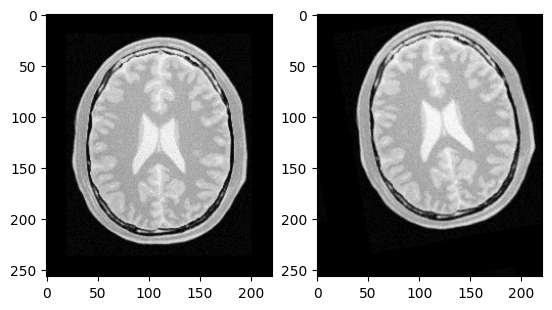

In [213]:
image_rec_move = itk.imread("data/BrainProtonDensitySliceR10X13Y17.png")
image_rec_ref = itk.imread("data/BrainProtonDensitySliceBorder20.png")
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_rec_ref,'gray')
ax2.imshow(image_rec_move,'gray')
plt.show()

In [214]:
optimizer_rec_rotation = itk.RegularStepGradientDescentOptimizer.New()
optimizer_rec_rotation.SetMaximumStepLength(1)
optimizer_rec_rotation.SetMinimumStepLength(0)
optimizer_rec_rotation.SetNumberOfIterations(5000)
# optimizer_rec_rotation.SetScales(1.0)
scales = [1000, 0.05, 0.05, 0.05, 0.05]
optimizer.SetScales(scales)

In [222]:
H,W = image_rec_ref.shape
# print(H,W)
ex3_transform = itk.CenteredRigid2DTransform[itk.D].New()
ex3_parameters = ex3_transform.GetParameters()
ex3_parameters[0] = 0 # angle
ex3_parameters[1] = H//2 # centre x
ex3_parameters[2] = W//2 # centre y
ex3_parameters[3] = 13 # translation x
ex3_parameters[4] = -17 # translation y


In [223]:
f=[]
def getMetricValue():
    f.append(optimizer_rec_rotation.GetValue())

In [224]:
registration_rot_filter = itk.ImageRegistrationMethod[ImageType, ImageType].New()
registration_rot_filter.SetFixedImage(image_rec_ref)
registration_rot_filter.SetMovingImage(image_rec_move)
registration_rot_filter.SetOptimizer(optimizer_rec_rotation)
registration_rot_filter.SetTransform(ex3_transform)
registration_rot_filter.SetInitialTransformParameters(ex3_parameters)
ex3_interpolate = itk.LinearInterpolateImageFunction[ImageType, itk.D].New()
registration_rot_filter.SetInterpolator(ex3_interpolate)
registration_rot_filter.SetMetric(itk.MeanSquaresImageToImageMetric[image_rec_ref, image_rec_move].New())
optimizer_rec_rotation.AddObserver(itk.IterationEvent(), getMetricValue)
registration_rot_filter.Update()


Iteration: 0
Iteration: 0
Iteration: 1
Iteration: 1
Iteration: 2
Iteration: 2
Iteration: 3
Iteration: 3
Iteration: 4
Iteration: 4
Iteration: 5
Iteration: 5
Iteration: 6
Iteration: 6
Iteration: 7
Iteration: 7
Iteration: 8
Iteration: 8
Iteration: 9
Iteration: 9
Iteration: 10
Iteration: 10
Iteration: 11
Iteration: 11
Iteration: 12
Iteration: 12
Iteration: 13
Iteration: 13
Iteration: 14
Iteration: 14
Iteration: 15
Iteration: 15
Iteration: 16
Iteration: 16
Iteration: 17
Iteration: 17
Iteration: 18
Iteration: 18
Iteration: 19
Iteration: 19
Iteration: 20
Iteration: 20
Iteration: 21
Iteration: 21
Iteration: 22
Iteration: 22
Iteration: 23
Iteration: 23
Iteration: 24
Iteration: 24
Iteration: 25
Iteration: 25
Iteration: 26
Iteration: 26
Iteration: 27
Iteration: 27
Iteration: 28
Iteration: 28
Iteration: 29
Iteration: 29
Iteration: 30
Iteration: 30
Iteration: 31
Iteration: 31
Iteration: 32
Iteration: 32
Iteration: 33
Iteration: 33
Iteration: 34
Iteration: 34
Iteration: 35
Iteration: 35
Iteration: 3

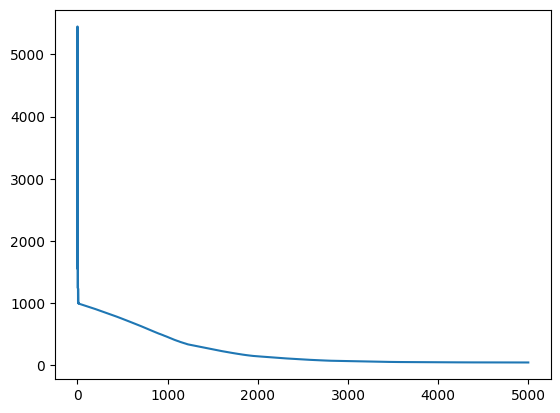

In [225]:
plt.plot(f)

In [226]:
ex3_final_transform = registration_rot_filter.GetTransform()
ex3_resample_filter = itk.ResampleImageFilter[image_rec_ref, image_rec_move].New()
ex3_resample_filter.SetInput(image_rec_move)
ex3_resample_filter.SetTransform(ex3_final_transform)
ex3_resample_filter.SetSize(image_rec_ref.GetLargestPossibleRegion().GetSize())
itk.imwrite(ex3_resample_filter.GetOutput(), 'data/brain_recalage_rotation.png')

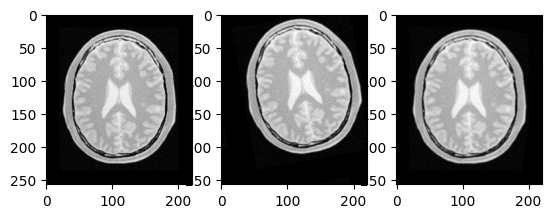

In [227]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
ax1.imshow(image_rec_ref,'gray')
ax2.imshow(image_rec_move,'gray')
ax3.imshow(ex3_resample_filter.GetOutput(),'gray')
plt.show()

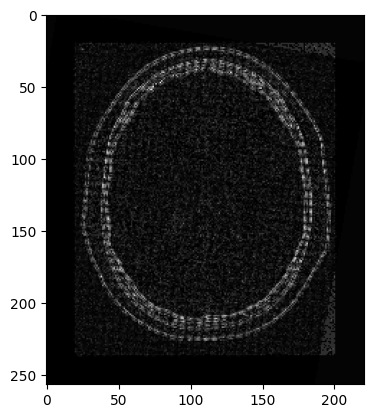

In [228]:
AbsoluteDiff = itk.absolute_value_difference_image_filter(image_rec_ref, ex3_resample_filter.GetOutput())
plt.imshow(AbsoluteDiff, 'gray')
plt.show()

# Exercice 4

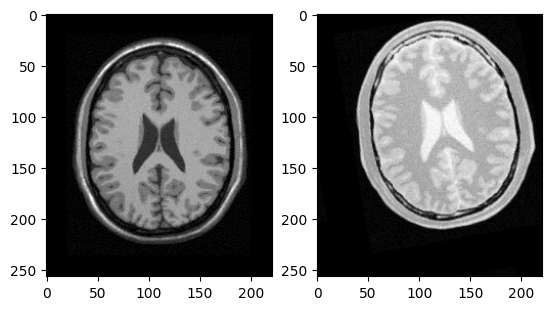

In [229]:
Image_ref_4 = itk.imread("data/BrainT1SliceBorder20.png")
Image_move_4 = itk.imread("data/BrainProtonDensitySliceR10X13Y17.png")
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Image_ref_4,'gray')
ax2.imshow(Image_move_4,'gray')
plt.show()

In [238]:
optimizer_4_rotation = itk.RegularStepGradientDescentOptimizer.New()
optimizer_4_rotation.SetMaximumStepLength(1)
optimizer_4_rotation.SetMinimumStepLength(0)
optimizer_4_rotation.SetNumberOfIterations(5000)
# optimizer_rec_rotation.SetScales(1.0)
scales = [1000, 0.05, 0.05, 0.05, 0.05]
optimizer_4_rotation.SetScales(scales)

In [239]:
H,W = Image_ref_4.shape
# print(H,W)
ex4_transform = itk.CenteredRigid2DTransform[itk.D].New()
ex4_parameters = ex4_transform.GetParameters()
ex4_parameters[0] = 0 # angle
ex4_parameters[1] = H//2 # centre x
ex4_parameters[2] = W//2 # centre y
ex4_parameters[3] = 13 # translation x
ex4_parameters[4] = -17 # translation y

In [240]:
f=[]
def getMetricValue():
    f.append(optimizer_4_rotation.GetValue())

In [243]:
registration_4_filter = itk.ImageRegistrationMethod[ImageType, ImageType].New()
registration_4_filter.SetFixedImage(Image_ref_4)
registration_4_filter.SetMovingImage(Image_move_4)
registration_4_filter.SetOptimizer(optimizer_4_rotation)
registration_4_filter.SetTransform(ex4_transform)
registration_4_filter.SetInitialTransformParameters(ex4_parameters)
ex4_interpolate = itk.LinearInterpolateImageFunction[ImageType, itk.D].New()
registration_4_filter.SetInterpolator(ex4_interpolate)
registration_4_filter.SetMetric(itk.MeanSquaresImageToImageMetric[Image_ref_4, Image_move_4].New())
optimizer_4_rotation.AddObserver(itk.IterationEvent(), getMetricValue)
registration_4_filter.Update()


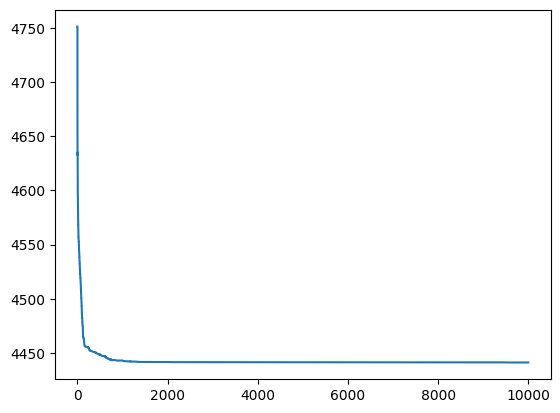

In [244]:
plt.plot(f)
plt.show()

In [245]:
ex4_final_transform = registration_rot_filter.GetTransform()
ex4_resample_filter = itk.ResampleImageFilter[Image_ref_4, Image_move_4].New()
ex4_resample_filter.SetInput(Image_move_4)
ex4_resample_filter.SetTransform(ex4_final_transform)
ex4_resample_filter.SetSize(Image_ref_4.GetLargestPossibleRegion().GetSize())
itk.imwrite(ex4_resample_filter.GetOutput(), 'data/brain_recalage_rotation.png')

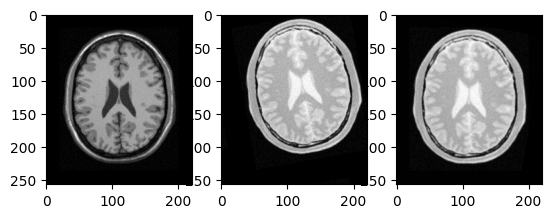

In [246]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
ax1.imshow(Image_ref_4,'gray')
ax2.imshow(Image_move_4,'gray')
ax3.imshow(ex4_resample_filter.GetOutput(),'gray')
plt.show()

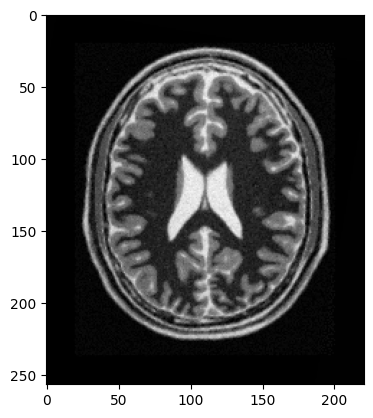

In [247]:
AbsoluteDiff = itk.absolute_value_difference_image_filter(Image_ref_4, ex4_resample_filter.GetOutput())
plt.imshow(AbsoluteDiff, 'gray')
plt.show()

# Exercice 5

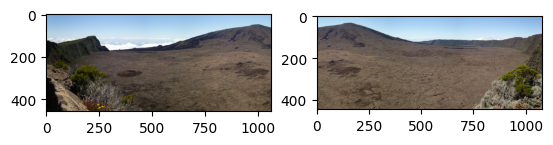

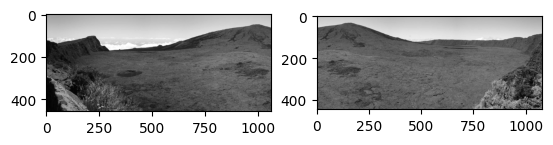

In [293]:
image_1 = itk.imread("data/PitonDeLaFournaise.jpg")
image_1_gray = itk.imread("data/PitonDeLaFournaise_gray.png")
image_2 = itk.imread("data/PitonDeLaFournaise2.jpg")
image_2_gray = itk.imread("data/PitonDeLaFournaise2_gray.png")
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(image_1,'gray')
ax2.imshow(image_2,'gray')
plt.show()
fig, (ax3,ax4)= plt.subplots(1,2)
ax3.imshow(image_1_gray,'gray')
ax4.imshow(image_2_gray,'gray')
plt.show()

In [298]:
mattes  = itk.MattesMutualInformationImageToImageMetric[type(image_1_gray), type(image_2_gray)].New()
mattes.SetNumberOfHistogramBins(50)
mattes.SetNumberOfSpatialSamples(10000)
# res = mattes.GetValue(image_1_gray, image_2_gray)